# Before the Challenge: Understanding Geospatial Data Operations
Geospatial data operations allow us to analyze and visualize spatial relationships and patterns. Key operations include overlaying datasets, spatial joins, buffering, and transforming tabular data into geospatial formats. These techniques are essential in urban planning, environmental analysis, and GIS applications.

## Challenge: Counting Trees in a Manhattan Neighborhood

In this challenge, you will count the number of trees within various buffer distances around a neighborhood in Manhattan using GeoPandas and a tree census dataset.

## Understanding and preprocessing the data:

- Importing libraries and loading data: Start by importing GeoPandas, pandas, Point geometry class from Shapely, and the usual Matplotlib library; then load the neighborhood polygons and tree census data
- Selecting a neighborhood: Focus on a specific neighborhood in Manhattan
- Creating a GeoDataFrame for trees: Convert the tree census data into a GeoDataFrame with point geometries

## Transforming and analyzing the data:

- Applying CRS transformation: Transform the GeoDataFrames to the local CRS of New York City (EPSG:2263)
- Buffering and counting trees: Create buffers around the neighborhood polygon at various distances and count the number of trees within each buffer zone

## Visualizing the data:

- Customizing the plot: Use Matplotlib to visualize the buffers and tree locations

## What you'll learn:

By the end of this challenge, you'll have experience with loading and transforming geospatial data, performing spatial joins and buffers, and creating informative visualizations.

## Hints on how to proceed:

- Ensure accurate CRS transformations for both datasets
- Use appropriate buffer distances to capture tree counts effectively
- Visualize the results clearly to interpret the data

In [1]:
# Importing necessary libraries
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
# Load the neighborhood polygons
gdf = gpd.read_file('../data/2010_nats.geojson')

# Select a specific neighborhood in Manhattan
gdf_ngh = gdf[gdf.boro_name == 'Manhattan'].head(1)

In [6]:
# Load the tree census data and create a GeoDataFrame in epsg:4326
tdf = pd.read_csv('../data/2015_Street_Tree_Census_-_Tree_Data_20241223.csv', nrows=10000)
geometry = [Point(xy) for xy in zip(tdf['longitude'], tdf['latitude'])]
tdf = gpd.GeoDataFrame(tdf, geometry=geometry)[['tree_id', 'stump_diam', 'status', 'health', 'geometry']]
tdf.crs = 4326

In [7]:
# Transform the GeoDataFrames to the local CRS of New York City (EPSG:2263)
gdf_ngh_local = gdf_ngh.to_crs(2263)
tdf_local = tdf.to_crs(2263)

In [8]:
# Define a list of distance values for buffering
distances = [10, 1000, 10000, 25000, 50000, 75000]

Distance: 10 feet
Tree count: 30

Distance: 1000 feet
Tree count: 71

Distance: 10000 feet
Tree count: 1547

Distance: 25000 feet
Tree count: 4281

Distance: 50000 feet
Tree count: 7928

Distance: 75000 feet
Tree count: 9166



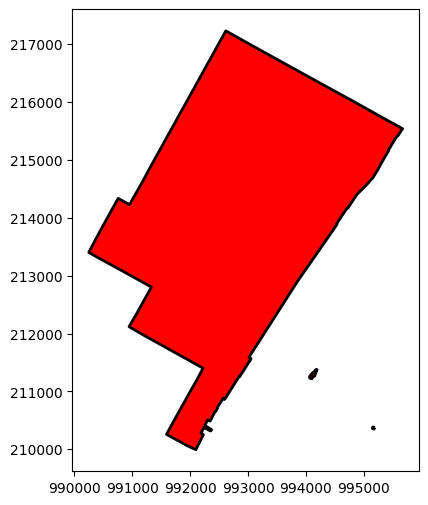

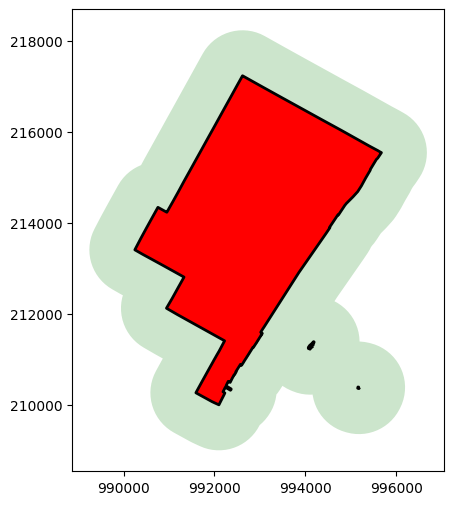

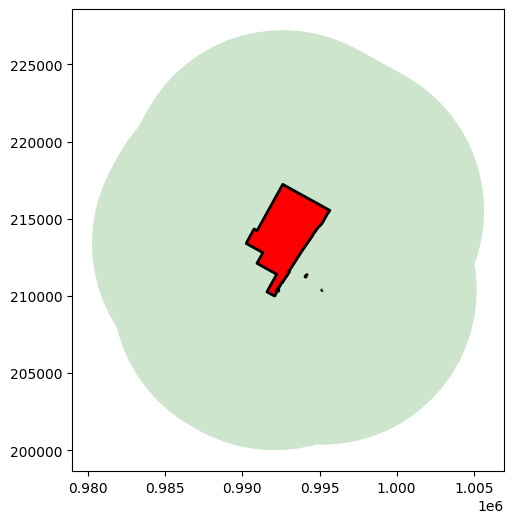

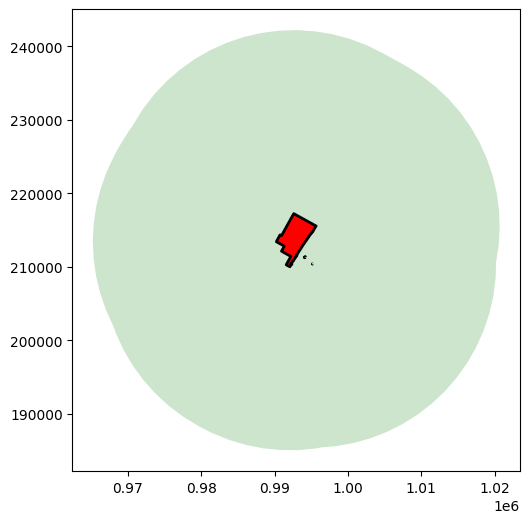

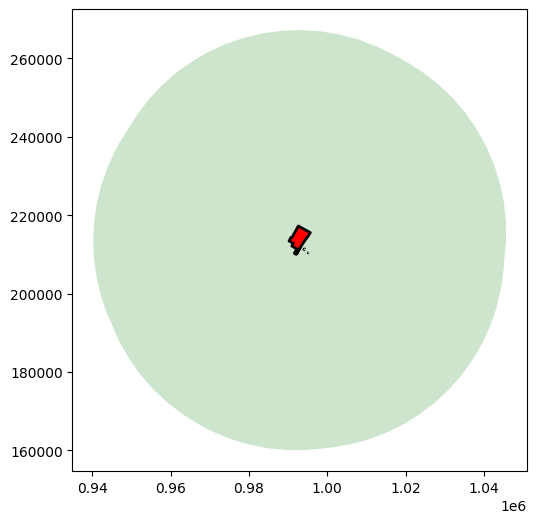

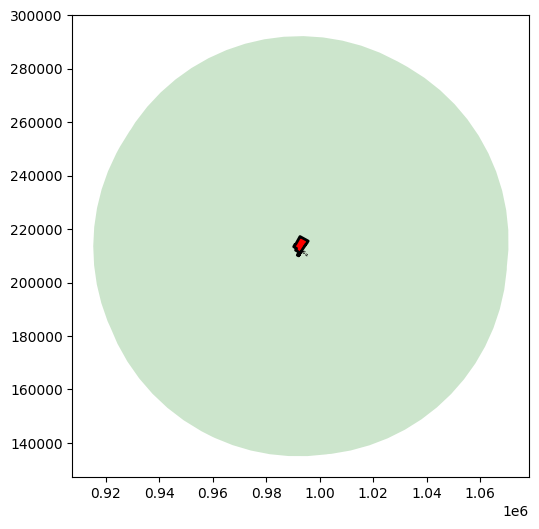

In [9]:
# Iterate over each distance, create buffers, and count trees within the buffer zone
for distance in distances:
    gdf_ngh_local_buffered = gdf_ngh_local.copy()
    gdf_ngh_local_buffered['geometry'] = gdf_ngh_local_buffered['geometry'].buffer(distance)
    gdf_joined = gpd.overlay(tdf_local, gdf_ngh_local_buffered, how='intersection')
    
    f, ax = plt.subplots(1, 1, figsize=(6, 6))
    gdf_ngh_local_buffered.plot(color='green', ax=ax, alpha=0.2)
    gdf_ngh_local.plot(color='red', ax=ax, edgecolor='k', linewidth=2)
    
    tree_count = len(gdf_joined['tree_id'].unique())
    print(f'Distance: {distance} feet')
    print(f'Tree count: {tree_count}')
    print()

    